## Assignment Seven

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./agaricus-lepiota.csv")
mushrooms = pd.get_dummies(data)
mushrooms.head()

edibility_e  edibility_p  cap-shape_b  cap-shape_c  cap-shape_f  \
0            0            1            0            0            0   
1            1            0            0            0            0   
2            1            0            1            0            0   
3            0            1            0            0            0   
4            1            0            0            0            0   

   cap-shape_k  cap-shape_s  cap-shape_x  cap-surface_f  cap-surface_g  ...  \
0            0            0            1              0              0  ...   
1            0            0            1              0              0  ...   
2            0            0            0              0              0  ...   
3            0            0            1              0              0  ...   
4            0            0            1              0              0  ...   

   population_s  population_v  population_y  habitat_d  habitat_g  habitat_l  \
0             1             0             0          0          0          0   
1             0             0             0          0          1          0   
2             0             0             0          0          0          0   
3             1             0             0          0          0          0   
4             0             0             0          0          1          0   

   habitat_m  habitat_p  habitat_u  habitat_w  
0          0          0          1          0  
1          0          0          0          0  
2          1          0          0          0  
3          0          0          1          0  
4          0          0          0          0  

[5 rows x 119 columns]

In [3]:
from sklearn.manifold import TSNE

In [4]:
model = TSNE(learning_rate=100)

In [5]:
transformed = model.fit_transform(mushrooms.values)
xs = transformed[:,0]
ys = transformed[:,1]
df_trans = pd.DataFrame({'xs': xs, 'ys': ys})

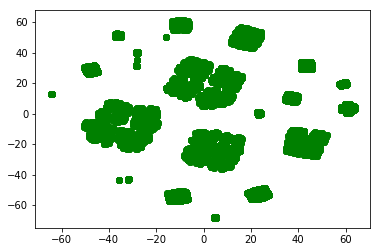

In [6]:
plt.scatter(xs, ys, c='green')
plt.show()

In [7]:
from sklearn.cluster import KMeans
from sklearn import metrics

xp=[]
yp=[]

for i in range(2, 30):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(df_trans.values)
    labels = model.predict(df_trans)
    score = metrics.silhouette_score(df_trans.values, labels, metric='euclidean')
    xp.append(i)
    yp.append(score)
    print(i)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


Text(10, 0.5965591, 'x: 10, y: 0.597')

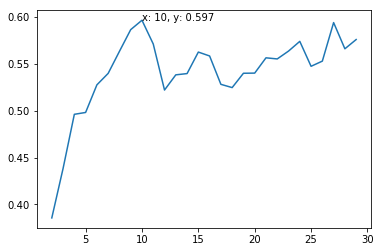

In [8]:
fig, ax = plt.subplots()
plt.plot(xp, yp)

y_max = max(yp)
x_pos = yp.index(y_max)
x_max = xp[x_pos]

text = f'x: {x_max}, y: {y_max:.3f}'

ax.annotate(text, xy=(x_max, y_max))

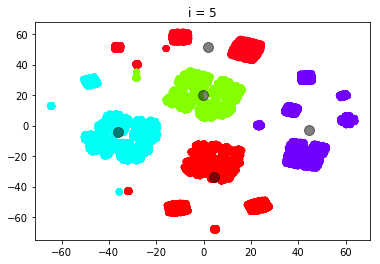

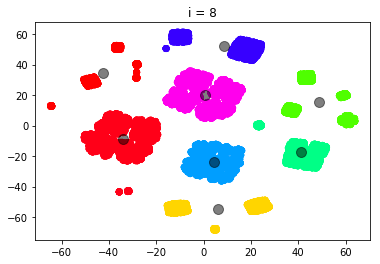

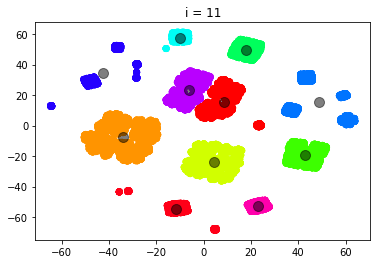

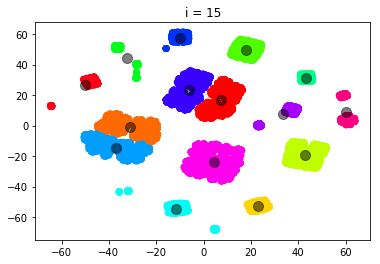

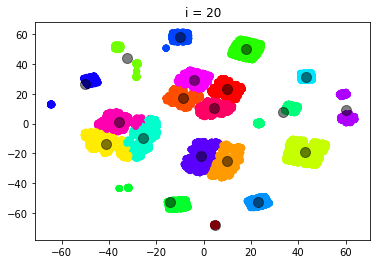

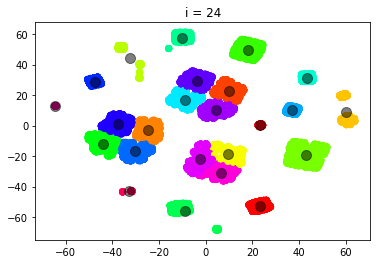

In [9]:
index = [5, 8, 11, 15, 20, 24]

for i in index:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_trans.values)
    y_kmeans = kmeans.predict(df_trans.values)
    plt.scatter(xs, ys, c=y_kmeans, cmap='hsv')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:,0], centers[:, 1], c='black', s=100, alpha=0.5)
    plt.title(f'i = {i}')
    plt.show()